In [198]:
using ITensors
using Plots
include("utils.jl");
using Random

In [199]:
Random.seed!(42)

TaskLocalRNG()

# Attempt at Generative Modelling

In [200]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");
mps1_base = load_mps_from_h5("mps1.h5", "mps1")

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=140|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=708|"Link,l=2"), (dim=2|id=140|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=277|"Link,l=3"), (dim=4|id=708|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=481|"Link,l=4"), (dim=8|id=277|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=749|"Link,l=5"), (dim=15|id=481|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=575|"Link,l=6"), (dim=15|id=749|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=697|"Link,l=7"), (dim=15|id=575|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=946|"Link,l=8"), (dim=15|id=697|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=257|"Link,l=9"), (dim=15|id=946|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=823|"Link,l=10"), (dim=15|id=257|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=858|"Link,l=11"), (dim=15|id=823|"Lin

In [201]:
abs(inner(mps0_base, mps1_base))

6.782373111515784e-16

In [202]:
function complex_feature_map(x::Float64)
    s1 = exp(1im * (3π/2) * x) * cospi(0.5 * x)
    s2 = exp(-1im * (2π/2) * x) * sinpi(0.5 * x)
    return [s1, s2]
end

complex_feature_map (generic function with 1 method)

# Start with Class 0 - Low Freq. Sinusoid

### Step 1 - Get the Reduced Density Matrix At Site 1

In [203]:
mps0_copy = deepcopy(mps0_base)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=268|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=355|"Link,l=2"), (dim=2|id=268|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=773|"Link,l=3"), (dim=4|id=355|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=249|"Link,l=4"), (dim=8|id=773|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=970|"Link,l=5"), (dim=15|id=249|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=58|"Link,l=6"), (dim=15|id=970|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=185|"Link,l=7"), (dim=15|id=58|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=881|"Link,l=8"), (dim=15|id=185|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=133|"Link,l=9"), (dim=15|id=881|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=776|"Link,l=10"), (dim=15|id=133|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=857|"Link,l=11"), (dim=15|id=776|"Link,

In [204]:
s = siteinds(mps0_copy);


Right orthogonalize. Place orthogonality center on site 1. When in this form, the reduced density matrix should be easy to compute. 

In [205]:
orthogonalize!(mps0_copy, 1)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=587|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=288|"Link,l=2"), (dim=2|id=587|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=440|"Link,l=3"), (dim=4|id=288|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=882|"Link,l=4"), (dim=8|id=440|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=498|"Link,l=5"), (dim=15|id=882|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=547|"Link,l=6"), (dim=15|id=498|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=539|"Link,l=7"), (dim=15|id=547|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=440|"Link,l=8"), (dim=15|id=539|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=556|"Link,l=9"), (dim=15|id=440|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=589|"Link,l=10"), (dim=15|id=556|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=938|"Link,l=11"), (dim=15|id=589|"Lin

In [206]:
ρ1 = prime(mps0_copy[1], s[1]) * dag(mps0_copy[1])
ρ1_m = matrix(ρ1)

2×2 Matrix{ComplexF64}:
  0.472331+0.0im       -0.136932+0.127616im
 -0.136932-0.127616im   0.527669+0.0im

Check the trace of the reduced density matrix

In [207]:
real(tr(ρ1_m))

0.9999999999999813

Check adjoint

In [208]:
isequal(adjoint(ρ1).tensor, ρ1.tensor)

true

Construct probe states over the rage of values to get the probability distribution.

In [209]:
abs(complex_feature_map(0.6)' * ρ1_m * complex_feature_map(0.6))

0.38718010674680503

In [210]:
xs = 0.0:0.01:1.0
probs = [abs(complex_feature_map(x)' * ρ1_m * complex_feature_map(x)) for x in xs];
probs_normed = probs ./ sum(probs);

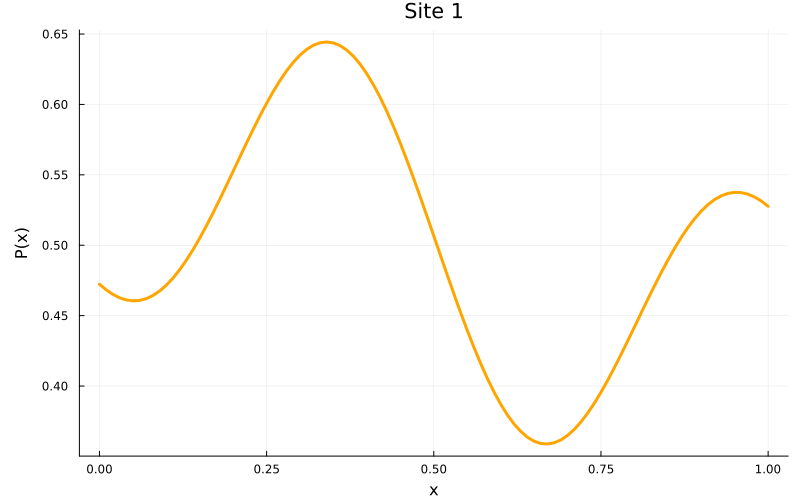

In [211]:
plot(xs, probs, label="", title="Site 1", c=:orange, lw=3, xlabel="x", ylabel="P(x)", size=(800, 500), left_margin=5mm)

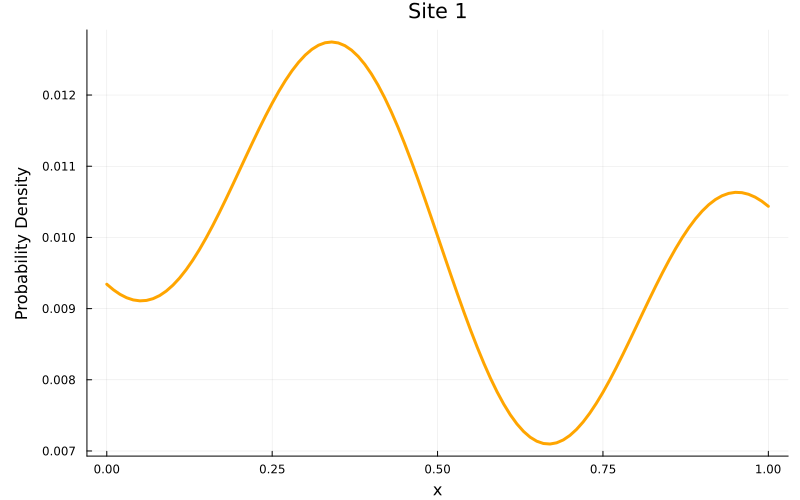

In [212]:
plot(xs, probs_normed, label="", title="Site 1", c=:orange, lw=3, xlabel="x", ylabel="Probability Density", size=(800, 500), left_margin=5mm)

Compute the cumulative distribution function (CDF) so we can use inverse transform sampling to sample a random value from this distribution. 

In [213]:
cdf_site_1 = cumsum(probs_normed);

Now generate a random value from the uniform distribution $U \sim (0,1)$

In [214]:
rand_val_site_1 = rand()

0.6293451231426089

In [227]:
findfirst(x -> x .> rand_val_site_1, cdf_site_1)

59

In [228]:
cdf_site_1[59]

0.6300291765818546

So the state in index 59 is our sampled state.

In [229]:
xs[59]

0.58

Let's convert this back to a quantum state for our projective measurement. We will first construct our projector and then convert it to a local (1-site) MPO that we can apply at the first site of our MPS to make the measurment.  

In [239]:
site_1_measured_state = ITensor(complex_feature_map(xs[59]), s[1])
site_1_measured_state.tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2-element
  -0.5624982836043592 + 0.24341474351345824im
 -0.19650356087045473 - 0.7653308396684788im

ITensor can only make projectors using MPS's, so we will have to convert our single ITensor to a 1 site MPS.

In [246]:
m = MPS(1)
m[1] = site_1_measured_state

ITensor ord=1 (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [248]:
site_1_projector = projector(m)

MPO
[1] ((dim=2|id=688|"S=1/2,Site,n=1")', (dim=2|id=688|"S=1/2,Site,n=1"))


In [256]:
site_1_projector[1].tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3756550564175727 - 4.30822093388717e-18im  …  -0.0757598943290669 - 0.4783291475717653im
 -0.0757598943290669 + 0.4783291475717653im        0.6243449435824273 - 4.485067025744171e-18im

Double check the trace and Hermitian properties. 

In [274]:
adjoint(site_1_projector[1]).tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")''
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")'
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3756550564175727 - 4.30822093388717e-18im  …  -0.0757598943290669 - 0.4783291475717653im
 -0.0757598943290669 + 0.4783291475717653im        0.6243449435824273 - 4.485067025744171e-18im